In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Replace 'path_to_excel_file.xlsx' with the actual path to your Excel file
# Set sheet_name=None to read data from all sheets
data = pd.read_excel(r"C:\Users\ifymb\OneDrive\Documents\Spotify_Data_EM.xlsx", sheet_name=None)

print(data)

{'StreamingHistory0':          artistName                            trackName           endTime  \
0      Toni Braxton                 He Wasn't Man Enough  2022-07-06 16:27   
1          Bobby V.              Slow Down - 12" Version  2022-07-06 16:27   
2          Fantasia  Free Yourself (feat. Missy Elliott)  2022-07-06 16:31   
3     CeCe Peniston                              Finally  2022-07-06 16:35   
4           Solange                    I Decided, Part 1  2022-07-06 16:41   
...             ...                                  ...               ...   
9995          L.A.X                                Sempe  2023-01-20 21:55   
9996        Beyoncé                               BIGGER  2023-01-20 22:00   
9997         Rotimi                            In My Bed  2023-01-20 22:03   
9998        Kehlani                                Water  2023-01-20 22:05   
9999    Fireboy DML                                 Peru  2023-01-20 22:06   

      msPlayed  
0       261933  
1      

In [4]:
sheet_name = 'StreamingHistory0'
sheet_data = data[sheet_name]
data_types = sheet_data.dtypes
print(data_types)


artistName    object
trackName     object
endTime       object
msPlayed       int64
dtype: object


In [5]:
# Read Excel file into a dictionary of DataFrames
excel_file = pd.ExcelFile(r"C:\Users\ifymb\OneDrive\Documents\Spotify_Data_EM.xlsx")
data = {sheet_name: excel_file.parse(sheet_name) for sheet_name in excel_file.sheet_names}

# Define the data type changes you want to apply
data_type_changes = {
    'StreamingHistory0': {'endTime': 'datetime64[ns]'},
    'StreamingHistory1': {'endTime': 'datetime64[ns]'},
    # Add more sheets and columns as needed
}

# Loop through each sheet's DataFrame and apply data type changes
for sheet_name, column_changes in data_type_changes.items():
    df = data[sheet_name]  # Get the DataFrame for the current sheet
    for column_name, new_data_type in column_changes.items():
         df[column_name] = df[column_name].astype(new_data_type)

# Now the data in the 'data' dictionary has the desired data type changes applied


In [6]:
sheet_name = 'StreamingHistory1'
sheet_data = data[sheet_name]
data_types = sheet_data.dtypes
print(data_types)

artistName            object
trackName             object
endTime       datetime64[ns]
msPlayed               int64
dtype: object


In [7]:
print(data)

{'StreamingHistory0':          artistName                            trackName             endTime  \
0      Toni Braxton                 He Wasn't Man Enough 2022-07-06 16:27:00   
1          Bobby V.              Slow Down - 12" Version 2022-07-06 16:27:00   
2          Fantasia  Free Yourself (feat. Missy Elliott) 2022-07-06 16:31:00   
3     CeCe Peniston                              Finally 2022-07-06 16:35:00   
4           Solange                    I Decided, Part 1 2022-07-06 16:41:00   
...             ...                                  ...                 ...   
9995          L.A.X                                Sempe 2023-01-20 21:55:00   
9996        Beyoncé                               BIGGER 2023-01-20 22:00:00   
9997         Rotimi                            In My Bed 2023-01-20 22:03:00   
9998        Kehlani                                Water 2023-01-20 22:05:00   
9999    Fireboy DML                                 Peru 2023-01-20 22:06:00   

      msPlayed  


In [8]:
column_name = 'endTime'
sheet_name = 'StreamingHistory0'
column_data = data[sheet_name][column_name]

print(column_data)

0      2022-07-06 16:27:00
1      2022-07-06 16:27:00
2      2022-07-06 16:31:00
3      2022-07-06 16:35:00
4      2022-07-06 16:41:00
               ...        
9995   2023-01-20 21:55:00
9996   2023-01-20 22:00:00
9997   2023-01-20 22:03:00
9998   2023-01-20 22:05:00
9999   2023-01-20 22:06:00
Name: endTime, Length: 10000, dtype: datetime64[ns]


In [9]:
column_name = 'endTime'
sheet_name = 'StreamingHistory1'
column_data = data[sheet_name][column_name]

print(column_data)

0      2023-01-20 22:08:00
1      2023-01-20 22:11:00
2      2023-01-20 22:13:00
3      2023-01-20 22:17:00
4      2023-01-20 22:18:00
               ...        
7887   2023-07-06 19:00:00
7888   2023-07-06 19:02:00
7889   2023-07-06 19:04:00
7890   2023-07-06 19:19:00
7891   2023-07-06 19:47:00
Name: endTime, Length: 7892, dtype: datetime64[ns]


In [10]:

# Specify the sheet name and column name you want to convert
sheet_name = "StreamingHistory0"
column_name = "msPlayed" 

# Access the DataFrame for the specified sheet
df = data[sheet_name]

# Convert msPlayed(milliseconds) to minutes (1 minute = 60,000 milliseconds)
df['minutes_played'] = df[column_name] / 60000

# Round the 'minutes_played' values to two decimal places
df['minutes_played'] = df['minutes_played'].apply(lambda x: round(x, 2))

# Print the updated DataFrame for the specified sheet
print(df)


         artistName                            trackName             endTime  \
0      Toni Braxton                 He Wasn't Man Enough 2022-07-06 16:27:00   
1          Bobby V.              Slow Down - 12" Version 2022-07-06 16:27:00   
2          Fantasia  Free Yourself (feat. Missy Elliott) 2022-07-06 16:31:00   
3     CeCe Peniston                              Finally 2022-07-06 16:35:00   
4           Solange                    I Decided, Part 1 2022-07-06 16:41:00   
...             ...                                  ...                 ...   
9995          L.A.X                                Sempe 2023-01-20 21:55:00   
9996        Beyoncé                               BIGGER 2023-01-20 22:00:00   
9997         Rotimi                            In My Bed 2023-01-20 22:03:00   
9998        Kehlani                                Water 2023-01-20 22:05:00   
9999    Fireboy DML                                 Peru 2023-01-20 22:06:00   

      msPlayed  minutes_played  
0     

In [11]:
# Specify the sheet name and column name you want to convert
sheet_name = "StreamingHistory1"
column_name = "msPlayed" 

# Access the DataFrame for the specified sheet
df = data[sheet_name]

# Convert msPlayed(milliseconds) to minutes (1 minute = 60,000 milliseconds)
df['minutes_played'] = df[column_name] / 60000

# Round the 'minutes_played' values to two decimal places
df['minutes_played'] = df['minutes_played'].apply(lambda x: round(x, 2))

# Print the updated DataFrame for the specified sheet
print(df)

       artistName                       trackName             endTime  \
0             FLO     Cardboard Box - Happi Remix 2023-01-20 22:08:00   
1          YEИDRY                           KI-KI 2023-01-20 22:11:00   
2         Beyoncé              FIND YOUR WAY BACK 2023-01-20 22:13:00   
3          Rotimi                     Love Riddim 2023-01-20 22:17:00   
4         DJ Flex  Put Your Back In It (Afrobeat) 2023-01-20 22:18:00   
...           ...                             ...                 ...   
7887       Soundz                       Attention 2023-07-06 19:00:00   
7888  Kizz Daniel                    Boys Are Bad 2023-07-06 19:02:00   
7889     melvitto                Santorini Coffee 2023-07-06 19:04:00   
7890      Olamide               Want (feat. Fave) 2023-07-06 19:19:00   
7891  FIFTY FIFTY               Cupid - Twin Ver. 2023-07-06 19:47:00   

      msPlayed  minutes_played  
0       150638            2.51  
1       141335            2.36  
2       162353          

In [12]:
for sheet_name, df in data.items():
    print(f"Sheet Name: {sheet_name}")
    print(df.head())  # Display the first few rows of the DataFrame
   
    print(df.describe())  # Calculate summary statistics if the DataFrame is not empty

Sheet Name: StreamingHistory0
      artistName                            trackName             endTime  \
0   Toni Braxton                 He Wasn't Man Enough 2022-07-06 16:27:00   
1       Bobby V.              Slow Down - 12" Version 2022-07-06 16:27:00   
2       Fantasia  Free Yourself (feat. Missy Elliott) 2022-07-06 16:31:00   
3  CeCe Peniston                              Finally 2022-07-06 16:35:00   
4        Solange                    I Decided, Part 1 2022-07-06 16:41:00   

   msPlayed  minutes_played  
0    261933            4.37  
1      4001            0.07  
2    257426            4.29  
3    245000            4.08  
4    253329            4.22  
           msPlayed  minutes_played
count  1.000000e+04    10000.000000
mean   1.546178e+05        2.577005
std    1.367157e+05        2.278526
min    0.000000e+00        0.000000
25%    7.394650e+04        1.230000
50%    1.680000e+05        2.800000
75%    2.082960e+05        3.470000
max    4.156658e+06       69.280000
She

In [13]:
# Specify the sheet name and column name
sheet_name = "StreamingHistory0"
column_name = "minutes_played" 

sheet_name1 = "StreamingHistory1"
column_name1 = "minutes_played" 

# Access the specified sheets
df = data[sheet_name]
df1 = data[sheet_name1]

# Calculate total minutes_played and round to the nearest whole number
sum_minutes_played = round(df[column_name].sum())
sum_minutes_played1 = round(df1[column_name].sum())

# Add the sum outputs together
total_sum = sum_minutes_played + sum_minutes_played1

# Print results
print("1st half Minutes Played:", sum_minutes_played)
print("2nd half Minutes Played:", sum_minutes_played1)
print("Total Minutes Played:", total_sum)

1st half Minutes Played: 25770
2nd half Minutes Played: 19098
Total Minutes Played: 44868


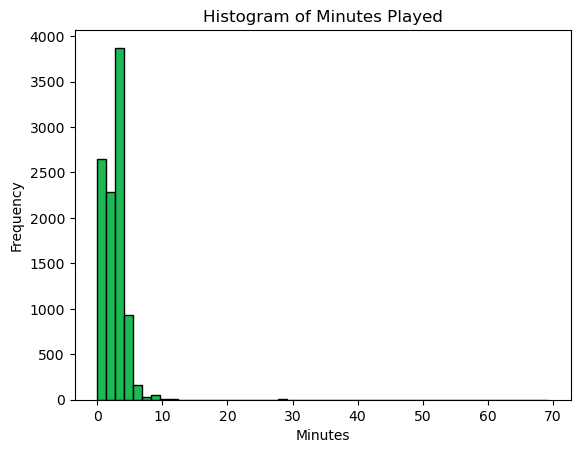

In [14]:
# Specify the column name
sheet_name = 'StreamingHistory0'
column_name = 'minutes_played'

# Extract column data
column_data = data[sheet_name][column_name]

# Create a histogram using Matplotlib
plt.hist(column_data, bins=50, color='#1db954', edgecolor='black')
plt.title(f'Histogram of Minutes Played')
plt.xlabel('Minutes')
plt.ylabel('Frequency')

plt.show()

In [33]:
average_counts_per_day = {}

for sheet_name, filtered_df in filtered_data.items():
    # Group data by date and calculate the average count of 'trackName'
    daily_average = filtered_df.groupby(filtered_df['endTime'].dt.date)['trackName'].count().mean()
    
    # Store the result in the dictionary
    average_counts_per_day[sheet_name] = daily_average

# Print the average counts per day for each sheet
for sheet_name, daily_average in average_counts_per_day.items():
    print(f"Sheet Name: {sheet_name}")
    print(f"Average Count of 'trackName' per Day: {daily_average}")
    print()


Sheet Name: StreamingHistory0
Average Count of 'trackName' per Day: 59.27777777777778

Sheet Name: StreamingHistory1
Average Count of 'trackName' per Day: 50.58974358974359



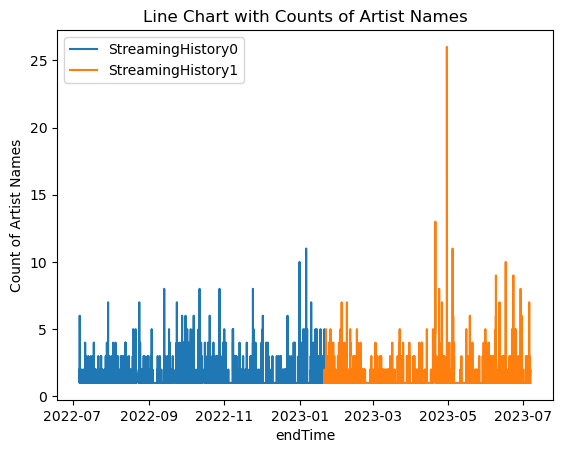

In [15]:
# Iterate through the sheets and plot a line chart for each
for sheet_name, df in data.items():
    # Calculate the count of unique 'artistName' values for each 'endTime'
    counts = df.groupby('endTime')['artistName'].count()

    # Reset the index to make 'endTime' a column
    counts = counts.reset_index()

    # Create a line chart with 'endTime' on the X-axis and counts on the Y-axis
    plt.plot(counts['endTime'], counts['artistName'], label=sheet_name)

# Add labels and a legend
plt.xlabel("endTime")
plt.ylabel("Count of Artist Names")
plt.title("Line Chart with Counts of Artist Names")
plt.legend()

# Show all the line charts
plt.show()

In [16]:
# Filter data by year 2023

filter_year = 2023

filtered_data = {}


print("Loop is running...")

for sheet_name, df in data.items():
    if 'endTime' in df.columns:
        filtered_df = df[df['endTime'].dt.year == filter_year]
        
        filtered_data[sheet_name] = filtered_df
 

Loop is running...


In [17]:
 for sheet_name, filtered_df in filtered_data.items():
    print(f"Sheet Name: {sheet_name}\n")
    print(filtered_df)
    print("\n" + "="*40 + "\n")  # Add a separator for clarity 

Sheet Name: StreamingHistory0

       artistName                   trackName             endTime  msPlayed  \
8933         Tems  Found (feat. Brent Faiyaz) 2023-01-02 16:33:00    209454   
8934     tobi lou                        2hrs 2023-01-02 16:34:00     44035   
8935         Tems          Témìládè Interlude 2023-01-02 16:38:00      6078   
8936         Tems                      Higher 2023-01-02 16:38:00      1060   
8937         Tems                      Higher 2023-01-02 16:38:00         0   
...           ...                         ...                 ...       ...   
9995        L.A.X                       Sempe 2023-01-20 21:55:00      1947   
9996      Beyoncé                      BIGGER 2023-01-20 22:00:00    226479   
9997       Rotimi                   In My Bed 2023-01-20 22:03:00    185461   
9998      Kehlani                       Water 2023-01-20 22:05:00    122813   
9999  Fireboy DML                        Peru 2023-01-20 22:06:00     70778   

      minutes_played

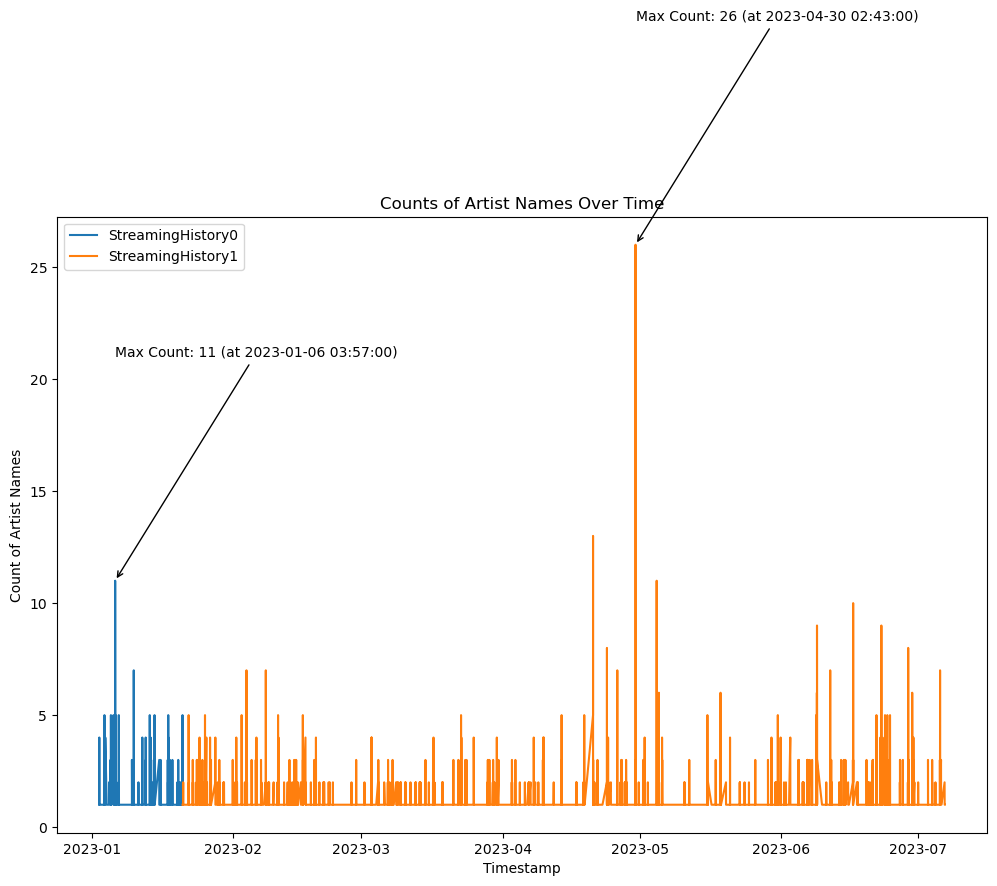

In [30]:
fig, ax = plt.subplots(figsize=(12,8))

for sheet_name, filtered_df in filtered_data.items():
    # Calculate the count of unique 'artistName' values for each 'endTime'
    counts = filtered_df.groupby('endTime')['artistName'].count()

  # Convert the 'endTime' column to timestamps (assuming it's in datetime format)
    counts.index = pd.to_datetime(counts.index)  # Convert the index to datetime

    # Create a line chart with 'timestamp' (index) on the X-axis and counts on the Y-axis
    ax.plot(counts.index, counts.values, label=sheet_name)
    
    
    # Find the maximum count and its corresponding timestamp
    max_count = counts.max()
    max_timestamp = counts.idxmax()

    # Annotate the chart with the maximum count
    ax.annotate(f'Max Count: {max_count} (at {max_timestamp.strftime("%Y-%m-%d %H:%M:%S")})',
                xy=(max_timestamp, max_count), xytext=(max_timestamp, max_count + 10),
                arrowprops=dict(arrowstyle='->'))

# Add labels and a legend
ax.set_xlabel('Timestamp')
ax.set_ylabel('Count of Artist Names')
ax.set_title('Counts of Artist Names Over Time')
ax.legend(loc='upper left')

# Show all the line charts
plt.show()


In [22]:
# Create an empty list to store the individual result DataFrames
result_dfs = []

# Iterate through the sheets and calculate the maximum count and its corresponding timestamp
for sheet_name, filtered_df in filtered_data.items():
    # Calculate the count of unique 'artistName' values for each 'endTime'
    counts = filtered_df.groupby('endTime')['artistName'].count()

    # Find the maximum count and its corresponding timestamp
    max_count = counts.max()
    max_timestamp = counts.idxmax()

    # Get the data values (artist names) under the max timestamp
    data_values = filtered_df[filtered_df['endTime'] == max_timestamp]['artistName'].tolist()

    # Create a DataFrame for the current sheet's result
    result_df = pd.DataFrame({'Sheet Name': [sheet_name], 'Timestamp': [max_timestamp], 'Count': [max_count], 'Data Values': [data_values]})

    # Append the result DataFrame to the list
    result_dfs.append(result_df)

# Concatenate all the individual result DataFrames into a single DataFrame
results_df = pd.concat(result_dfs, ignore_index=True)

# Display the results as a DataFrame with data values under the max timestamp
print("Results as DataFrame with Data Values:")
print(results_df)


Results as DataFrame with Data Values:
          Sheet Name           Timestamp  Count  \
0  StreamingHistory0 2023-01-06 03:57:00     11   
1  StreamingHistory1 2023-04-30 02:43:00     26   

                                         Data Values  
0  [¿Téo?, Olamide, Olamide, Alina Baraz, June Fr...  
1  [CLUB INDGO, Alex Vaughn, Alex Vaughn, Domenic...  


In [23]:
# Define the Excel file path where you want to save the results
output_excel_file = "results.xlsx"

# Write the DataFrame to an Excel file
results_df.to_excel(output_excel_file, index=False)

# Print a message to confirm that the file has been saved
print(f"Results have been saved to {output_excel_file}")

Results have been saved to results.xlsx


In [24]:
import os

current_directory = os.getcwd()
print("Current Directory:", current_directory)


Current Directory: C:\Users\ifymb\Downloads


In [24]:
import json

In [25]:
# Replace the path with the actual path to your JSON file
file_path = "C:\\Users\\ifymb\\Downloads\\my_spotify_data\\MyData\\Playlist1.json"

# Use 'utf-8' encoding when opening the file
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)


In [26]:
# Access playlists
playlists = data['playlists']

# Loop through playlists
for playlist in playlists:
    print("Playlist Name:", playlist['name'])
    print("Last Modified Date:", playlist['lastModifiedDate'])
    print("Number of Followers:", playlist['numberOfFollowers'])

# Access items within the playlist
items = playlist['items']

# Loop through items
for item in items:
        track = item['track']
        print("Track Name:", track['trackName'])
        print("Artist Name:", track['artistName'])
        print("Album Name:", track['albumName'])
        print("Track URI:", track['trackUri'])
        print("Added Date:", item['addedDate'])

    print()  # Print a line between playlists for clarity

Playlist Name: Afrobeats love
Last Modified Date: 2023-06-29
Number of Followers: 0
Track Name: Angelus
Artist Name: Victony
Album Name: My Darling + Angelus
Track URI: spotify:track:2g43A8NJ0VInfpqUjsb5R6
Added Date: 2023-06-29
Track Name: My Darling
Artist Name: Victony
Album Name: My Darling + Angelus
Track URI: spotify:track:1Lyo0G6hpTjWfWi8zjd9Wz
Added Date: 2023-06-29
Track Name: Sare
Artist Name: Ayra Starr
Album Name: Ayra Starr
Track URI: spotify:track:5687UltkEFNIoi7friwKwt
Added Date: 2023-06-29
Track Name: Spell - Remix
Artist Name: Chike
Album Name: Spell
Track URI: spotify:track:1rgpvUOxnI0Mno6OTsXTFh
Added Date: 2023-06-29
Track Name: In The Light - Stripped Version
Artist Name: Johnny Drille
Album Name: In The Light
Track URI: spotify:track:5mYqU9e8dtRolpcS1FFE5B
Added Date: 2023-06-29
Track Name: How Many Times
Artist Name: DJ Big N
Album Name: How Many Times
Track URI: spotify:track:45Vvoe20MW6GD7FwoacZc8
Added Date: 2023-06-29
Track Name: Body & Soul
Artist Name: Joe

TypeError: 'NoneType' object is not subscriptable

In [28]:
# Access playlists
playlists = data['playlists']

# Loop through playlists
for playlist in playlists:
    # Access items within the playlist
    items = playlist['items']

# Count the number of items in the playlist
    num_items = len(items)
    print("Playlist Name:", playlist['name'])
    print("Number of Items in Playlist:", num_items)
    print()  # Print a line between playlists for clarity


Playlist Name: Afrobeats love
Number of Items in Playlist: 10

Playlist Name: My Shazam Tracks
Number of Items in Playlist: 9

Playlist Name: Getting ready
Number of Items in Playlist: 21

Playlist Name: My playlist #21
Number of Items in Playlist: 3

Playlist Name: Songs Like: Careless Whisper - George Michael (generated with Songs Like X)
Number of Items in Playlist: 50

Playlist Name: THE playlist
Number of Items in Playlist: 5

Playlist Name: Harley❤️🖤
Number of Items in Playlist: 3

Playlist Name: 🏋🏽‍♀️
Number of Items in Playlist: 7

Playlist Name: GetReadyWithEsther 09.22.22
Number of Items in Playlist: 30

Playlist Name: Feeling Myself 💃🏽
Number of Items in Playlist: 6

Playlist Name: Always you
Number of Items in Playlist: 13

Playlist Name: Songs that make my heart glow
Number of Items in Playlist: 2

Playlist Name: Feeding my Aura❤️‍🩹
Number of Items in Playlist: 53

Playlist Name: Throwback songs that have my ❤️
Number of Items in Playlist: 57

Playlist Name: Rollin' and de

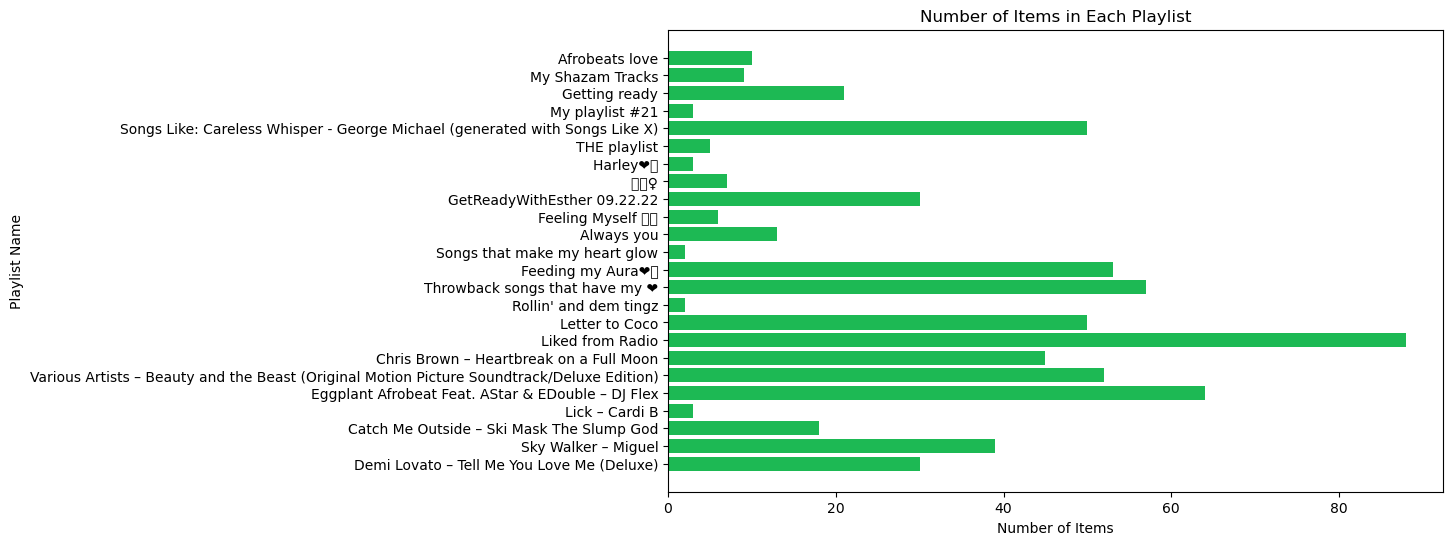

In [30]:
# Access playlists
playlists = data['playlists']

# Extract playlist names and number of items
playlist_names = [playlist['name'] for playlist in playlists]
num_items = [len(playlist['items']) for playlist in playlists]

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(playlist_names, num_items, color='#1db954')
plt.xlabel('Number of Items')
plt.ylabel('Playlist Name')
plt.title('Number of Items in Each Playlist')
plt.gca().invert_yaxis()  # Invert y-axis to have the playlist with most items on top
plt.show()
